In [35]:


import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [36]:
df = pd.read_csv(r"C:\Users\asus\Desktop\Walmart-DataSet\Reviews.csv")

In [37]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [39]:
df.UserId

0         A3SGXH7AUHU8GW
1         A1D87F6ZCVE5NK
2          ABXLMWJIXXAIN
3         A395BORC6FGVXV
4         A1UQRSCLF8GW1T
               ...      
568449    A28KG5XORO54AY
568450    A3I8AFVPEE8KI5
568451    A121AA1GQV751Z
568452     A3IBEVCTXKNOH
568453    A3LGQPJCZVL9UC
Name: UserId, Length: 568454, dtype: object

# 1. (a) Highest and lowest rating for the products

In [40]:
max = df["Score"].max()
print(f"Highest Rating for the product is {max}")
minimum = df["Score"].min()
print(f"Highest Rating for the product is {minimum}")

Highest Rating for the product is 5
Highest Rating for the product is 1


# Percentage wise product ratings for the entire data

In [41]:
product_precent = df["Score"].value_counts(normalize = True) * 100
print(f"Percentage wise product ratings for the entire data \n{round(product_precent, 2)}")


Percentage wise product ratings for the entire data 
5    63.88
4    14.19
1     9.19
3     7.50
2     5.24
Name: Score, dtype: float64


# 2. Total number of reviews by unique profiles. How many customers or profiles have reviewed more than one product?

In [42]:
print(f"Total number of reviews by unique profiles : {len(df['UserId'].unique())}")

Total number of reviews by unique profiles : 256059


In [43]:
#  How many customers or profiles have reviewed more than one product?
df2 = len(df['UserId'])-len(df['UserId'].drop_duplicates())
print(f"customers or profiles have reviewed more than one product: {df2}")


customers or profiles have reviewed more than one product: 312395


In [44]:
df = df[['Text','Score']].dropna()


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    568454 non-null  object
 1   Score   568454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [46]:
df.Score.value_counts().index

Int64Index([5, 4, 1, 3, 2], dtype='int64')

Text(0, 0.5, 'No of times')

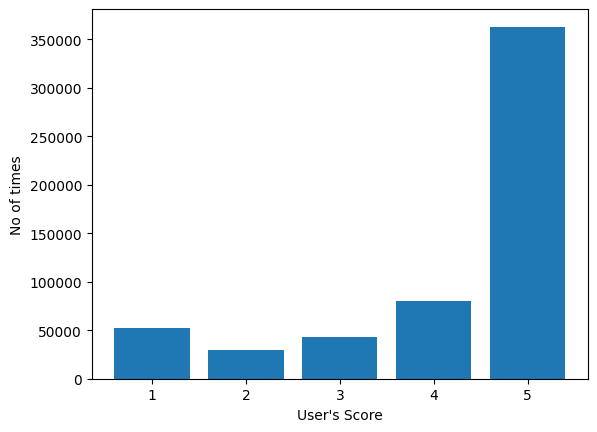

In [47]:
import matplotlib.pyplot as plt
plt.bar(df.Score.value_counts().index, df.Score.value_counts().values)
plt.xlabel("User's Score")
plt.ylabel("No of times")

In [48]:
df.Score[df.Score<=3]=0
df.Score[df.Score>=4]=1

C:\Users\asus\AppData\Local\Temp\ipykernel_9268\3920069056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Score[df.Score<=3]=0
C:\Users\asus\AppData\Local\Temp\ipykernel_9268\3920069056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Score[df.Score>=4]=1


In [49]:
df = df.sample(n=5000,replace=True)


In [50]:
import spacy
from spacy.lang.en import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

nlp = spacy.load("en_core_web_sm")
parser = English()



In [51]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess(text):
    processed_tokens = []
    try:
        tokens = nlp(text)
        for token in tokens:
            if not token.is_stop and token.is_alpha:
                processed_tokens.append(token.lemma_)
    except Exception as e:
        print(f"Error processing text '{text}': {str(e)}")
    return " ".join(processed_tokens)







In [52]:
df["processed_text"] = df["Text"].apply(preprocess)


In [53]:
df.Score.value_counts()

1    400
0    100
Name: Score, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df["processed_text"], df["Score"], test_size=0.2, random_state=42)


In [55]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [56]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


In [57]:
text = "This product is amazing!"
processed_text = preprocess(text)
X = vectorizer.transform([processed_text])
sentiment = clf.predict(X)
print(sentiment[0])


1
